In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/home/sscf/freqtrade_custom_strats/python_concepts/pivot_points/Binance_BTCUSDT_d.csv")
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.665446e+12,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94,9337.97001,1.777093e+08,158282.0
1,1.665360e+12,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87,212509.09849,4.101745e+09,4432688.0
2,1.665274e+12,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02,113900.82681,2.215007e+09,2833704.0
3,1.665187e+12,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96,102480.09842,1.995917e+09,2637385.0
4,1.665101e+12,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09,220874.83913,4.353681e+09,4324772.0
...,...,...,...,...,...,...,...,...,...,...
1878,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1879,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1880,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1881,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [3]:
df = df.drop(["unix", "symbol", "Volume BTC", "tradecount"], axis = 1)
df = df[::-1]
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)
df

,open,high,low,close,Volume USDT
date,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,2.812379e+06
2017-08-18,4285.08,4371.52,3938.77,4108.37,4.994494e+06
2017-08-19,4108.37,4184.69,3850.00,4139.98,1.508239e+06
2017-08-20,4139.98,4211.08,4032.62,4086.29,1.915636e+06
2017-08-21,4086.29,4119.62,3911.79,4016.00,2.770592e+06
...,...,...,...,...,...
2022-10-07,19960.67,20068.82,19320.00,19530.09,4.353681e+09
2022-10-08,19530.09,19627.38,19237.14,19417.96,1.995917e+09
2022-10-09,19416.52,19558.00,19316.04,19439.02,2.215007e+09


In [4]:
df["vol"] = (df["close"].rolling(20).std() / df["close"])
df

,open,high,low,close,Volume USDT,vol
date,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,2.812379e+06,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,4.994494e+06,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,1.508239e+06,NaN
2017-08-20,4139.98,4211.08,4032.62,4086.29,1.915636e+06,NaN
2017-08-21,4086.29,4119.62,3911.79,4016.00,2.770592e+06,NaN
...,...,...,...,...,...,...
2022-10-07,19960.67,20068.82,19320.00,19530.09,4.353681e+09,0.023158
2022-10-08,19530.09,19627.38,19237.14,19417.96,1.995917e+09,0.023292
2022-10-09,19416.52,19558.00,19316.04,19439.02,2.215007e+09,0.023197


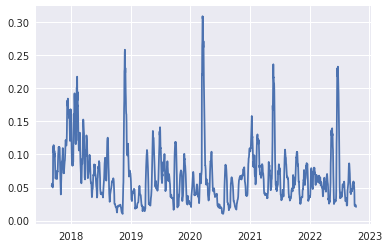

In [5]:
plt.style.use("seaborn")
plt.plot(df.index, df["vol"])